In [1]:
import numpy
import matplotlib.pyplot as plt
import cv2
from enhance import enhance_medical_image
from time import time
from subpixel_edges import init, subpixel_edges

In [2]:
scaleX = 1
scaleY = 1

y = 1300  # donde empieza el corte en y
x = 1600  # donde empieza el corte en x
h = 600  # tamaño del corte en h
w = 600  # tamaño del corte en y

In [3]:
img = (cv2.imread('imagenes_orginales/Caso A BN.png'))
img_gray = (cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)).astype(float)
zoom = img_gray[y:y + h, x:x + w]


In [4]:
enhanced = enhance_medical_image(zoom)

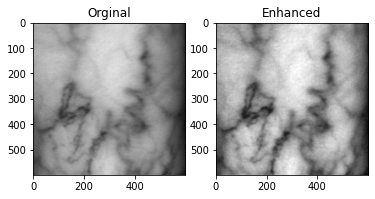

In [5]:
fig = plt.figure()

f1 = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(zoom, cmap="gray")
f1.set_title("Orginal")

f1 = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(enhanced, cmap="gray")
f1.set_title("Enhanced")

plt.show()

In [6]:
iters = 2
threshold = 4.5
order = 2

In [7]:
print("Initializing...")
now = time()
init()
elapsed = time() - now
print("Initialization time: ", elapsed)

Initializing...
Initialization time:  13.699599742889404


In [8]:
print("Processing original image...")
now = time()
edges = subpixel_edges(zoom, threshold, iters, order)
elapsed = time() - now
print("Processing time: ", elapsed)

print("Processing image with anisotropic diffusion...")
now = time()
edges_enhanced = subpixel_edges(enhanced, threshold, iters, order)
elapsed = time() - now
print("Processing time: ", elapsed)

Processing original image...
Processing time:  0.05907440185546875
Processing image with anisotropic diffusion...
Processing time:  6.759839057922363


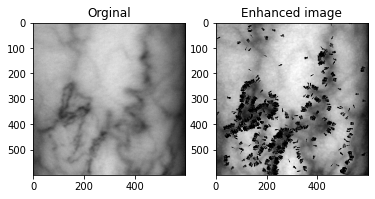

In [9]:
fig = plt.figure()

f1 = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(zoom, cmap="gray")
imgplot = plt.quiver(edges.x, edges.y, edges.nx, -edges.ny, scale=40)
f1.set_title("Orginal")

f1 = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(enhanced, cmap="gray")
imgplot = plt.quiver(edges_enhanced.x, edges_enhanced.y, edges_enhanced.nx, -edges_enhanced.ny, scale=40)
f1.set_title("Enhanced image")

plt.show()